In [123]:
import pandas as pd 
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

dataset = pd.read_csv("./Desktop/FYP/testdata.csv")

In [124]:
type(dataset.values)
corpus = dataset.head(1)
#print(corpus)

In [126]:
JD = dataset["jobdescription"]
corpus = ""
for i in JD:
    corpus += str(i)
    #corpus.append(str(i))
    #print (type(i))
#corpus
#print(type(JD))

In [127]:
#Import Lib & Creating Objects
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

data = []

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [77]:
#Cleaning Dataset
for i in range (0, len(JD)):
    review = re.sub('[^a-zA-Z]', ' ', JD[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) 
               for word in review 
                  if not word in stopwords.words('english')]
    review = ' '.join(review)
    #print (type(review))
    data.append(review)   

In [78]:
#Printing Clean Data

print(type(data))
data[996]

<class 'list'>


'u iar system world leading independent provider software programming processor embedded system software embedded workbench known ease use quality several world record benchmark performance used around customer develop product based bit processor mainly area industrial automation medical device consumer electronics automotive industry recently concept internet thing creating another huge potential market iar system corporate headquarters based sweden sale organization represented strong global presence local office california texas massachusetts usa japan south korea china germany france sweden market leader iar system always strives preferred choice talented competent employee manager industry company success also lie utilizing strength individual existing competency continuously promoting personal development well offering new challenge employee iar system software looking fill position account manager marlborough sale office candidate experience selling embedded software system uniq

In [79]:
#TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
matrix_input = tfidf.fit_transform(data)
matrix_input

<2999x25920 sparse matrix of type '<class 'numpy.float64'>'
	with 467426 stored elements in Compressed Sparse Row format>

In [80]:
#Resultant Matrix Conversion Into Array Format

X = matrix_input.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
#Mean Shift Clustering

from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

#bandwidth = estimate_bandwidth(X,quantile=1, n_samples=10)
ms = MeanShift(bandwidth=1, bin_seeding=False).fit(X)
ms

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [82]:
#Cluster ID's

ms.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
#Unique Cluster ID's

labels_unique_ms = np.unique(ms.labels_)
labels_unique_ms

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [130]:
#Total No of Clusters

n_clusters = len(labels_unique_ms)
n_clusters

253

In [85]:
clusters_center = ms.cluster_centers_
clusters_center
#thanks to M.Uzair
dic= {}
labels = ms.labels_
counter = 0
for i in labels:
    if(i not in dic):
        dic[i] = [data[counter]]
        
    else:
        dic[i].append(data[counter])
        
    counter += 1

In [86]:
#Printing Dictionary Data
lenOfDic = len(dic)
lenOfDic
print(len(dic[3]))

2


In [ ]:
#print(dic) #id = integer and value = multiple list of string
new_dic = {}
string = ""
count = 0
for clus_id in dic:
    jds = dic[clus_id]
    length = len(jds)
    for i in range(length):
        string += jds[i]
        string += "\n"
    new_dic[clus_id] = string
    string = ""

#print(new_dic[0])


In [116]:
len(dic[0])

2744

In [58]:
#Yet Another Keyword Extractor - YAKE

import yake



In [89]:
#Keywords Extraction 

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

all_keywords = []

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
dic_kw = {}
for i in range(len(new_dic)):
    words = []
    keywords = custom_kw_extractor.extract_keywords(new_dic[i])
    for kw in keywords:
           words.append(kw)
    dic_kw[i] = words
    #all_keywords.append(words)
print(dic_kw[0])

[('experience year experience', 3.435603072493373e-10), ('project management experience', 1.0524151979963528e-09), ('year experience working', 1.3301020156877953e-09), ('skill ability work', 1.5172286207980643e-09), ('year work experience', 1.6362550133710768e-09), ('software development experience', 1.6463680740083337e-09), ('year experience software', 1.8310194745586708e-09), ('communication skill ability', 1.8406769281695606e-09), ('experience software development', 1.872340162597713e-09), ('skill year experience', 1.887337996774935e-09), ('minimum year experience', 1.9496278742919894e-09), ('work experience year', 2.103756445762813e-09), ('year experience required', 2.454041021809309e-09), ('experience project management', 2.4656584638771694e-09), ('year related experience', 2.5576722599943773e-09), ('year experience business', 2.7375214127710527e-09), ('skill experience year', 2.75841707220952e-09), ('year experience data', 2.8848004475146605e-09), ('work experience experience', 2

In [96]:
#YAKE All Keywords Printing
print (dic_kw[200])

[('bijon msrcosmos comdesk', 0.0016679095247590279), ('spyglasslocation hillsboro oravailability', 0.0025071920464883814), ('citizen party authorized', 0.0025071920464883814), ('encouraged apply unable', 0.0025071920464883814), ('apply unable sponsor', 0.0025071920464883814), ('unable sponsor skill', 0.0025071920464883814), ('sponsor skill setrtl', 0.0025071920464883814), ('experience yearsclock clock', 0.0025071920464883814), ('yearsclock clock gating', 0.0025071920464883814), ('clock gating reset', 0.0025071920464883814), ('gating reset expertiseexperience', 0.0025071920464883814), ('logical phy pipe', 0.0025071920464883814), ('phy pipe interface', 0.0025071920464883814), ('pipe interface familiarity', 0.0025071920464883814), ('avago semtek synopsystool', 0.0025071920464883814), ('semtek synopsystool expertise', 0.0025071920464883814), ('synopsystool expertise spyglass', 0.0025071920464883814), ('expertise spyglass dft', 0.0025071920464883814), ('txv cdc synthesisscripting', 0.002507

In [97]:
def get_keywords(integer,data_list):
    specific_data = data_list[integer]
    for words in specific_data:
        print(words)

In [104]:
get_keywords(4,dic_kw)

('work small team', 0.0030293741590090443)
('small team design', 0.0030293741590090443)
('team design develop', 0.0030293741590090443)
('planning coordination obstacle', 0.0030293741590090443)
('coordination obstacle avoidance', 0.0030293741590090443)
('obstacle avoidance minimum', 0.0030293741590090443)
('avoidance minimum qualification', 0.0030293741590090443)
('computer science electrical', 0.0030293741590090443)
('science electrical mechanical', 0.0030293741590090443)
('electrical mechanical engineering', 0.0030293741590090443)
('mechanical engineering strong', 0.0030293741590090443)
('python java bonus', 0.0030293741590090443)
('java bonus plc', 0.0030293741590090443)
('planner coordinating system', 0.0030293741590090443)
('contact monika allen', 0.0030293741590090443)
('equal opportunity employer', 0.0030293741590090443)
('opportunity employer eoe', 0.0030293741590090443)
('engineer work small', 0.004146021868073351)
('design develop autonomous', 0.004146021868073351)
('navigatio

In [ ]:
#Highlight Keywords in the Textual Data

from yake.highlight import TextHighlighter

th = TextHighlighter(max_ngram_size = 3)
th.highlight(data[0], all_keywords[0])

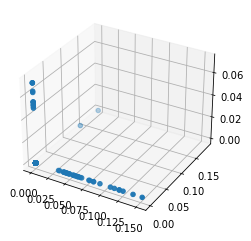

In [135]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
#ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()


In [72]:
### DB SCAN

from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=1, min_samples=1).fit(X)
clustering

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

In [71]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,